## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [95]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [96]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [97]:
# 把兩個訓練資料集和測試資料集讀進來

df_test=pd.read_csv('36_Titanic_test.csv')
df_train=pd.read_csv('36_Titanic_train.csv')

#df_test.head()
#df_train.head()

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [98]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

print(df_test.info())
print(df_test.describe())
print('=======')
print(df_train.info())
print(df_train.describe())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209  

## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [99]:
#可以嘗試用範例的程式

print(df_test.isnull().any())
print(df_test.isnull().any().sum())
dd=pd.DataFrame(df_test.isnull().any())

print('有遺失值的欄位：')
print(list(dd[dd[0]==True].index))


PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3
有遺失值的欄位：
['Age', 'Fare', 'Cabin']


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [100]:
#合併資料
dd=df_train.merge(df_test,how='outer')

#刪除重複資料
dd=dd.drop_duplicates()
dd

#處理遺失值
#d1_a=dd
#d1_b=dd['Cabin'].fillna(dd['Cabin'].mode())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64


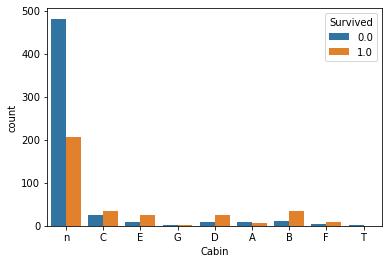

In [107]:
# 以 XXX 為例，先看 Cabin  出現值的特性

vv=dd['Cabin'].value_counts()
print(vv)

# 取出 Cabin 中的第一個字母，如果為缺漏值，則以 NoCabin 表示
dd['Cabin'] = dd['Cabin'].apply( lambda x:str(x)[0] if not pd.isnull(x) else 'NoCabin' )

plt.subplots()
sns.countplot( x='Cabin', hue='Survived', data=dd )
plt.legend( title='Survived', loc='upper right' )
plt.show()

In [ ]:
'''
由於Cabin欄位遺失內容過多(超過60%以上)，所以不建議用這欄位做變數，而是應該要將Cabin欄位刪除，
但因題目要求，所以繼續用Cabin，由圖可知，Cabin遺失值太多↑死亡率也↑，可以看出層關係。
'''